In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load dataset
df = pd.read_csv("data/MLTempDataset1.csv")
df['Date'] = pd.to_datetime(df['Datetime'])
df.set_index('Date', inplace=True)

In [2]:
# Resample to monthly frequency
df_monthly = df['Hourly_Temp'].resample('M').mean()

C:\Users\mckays1\AppData\Local\Temp\ipykernel_16912\2444010750.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df['Hourly_Temp'].resample('M').mean()


In [3]:
# Split into train and test
train = df_monthly.iloc[:-1]
test = df_monthly.iloc[-1:]

In [4]:
# Fit SARIMAX model
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,10), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\mckays1\OneDrive - Wentworth Institute of Technology\Documents\GithubRedownload\time-series-tutorials-2025\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [5]:
# Forecast next 30 days
forecast = results.get_forecast(steps=5)
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

In [6]:
# Extract forecast values
forecast_index = predicted_mean.index.to_pydatetime()
forecast_values = predicted_mean.values
conf_lower = conf_int.iloc[:, 0].values
conf_upper = conf_int.iloc[:, 1].values

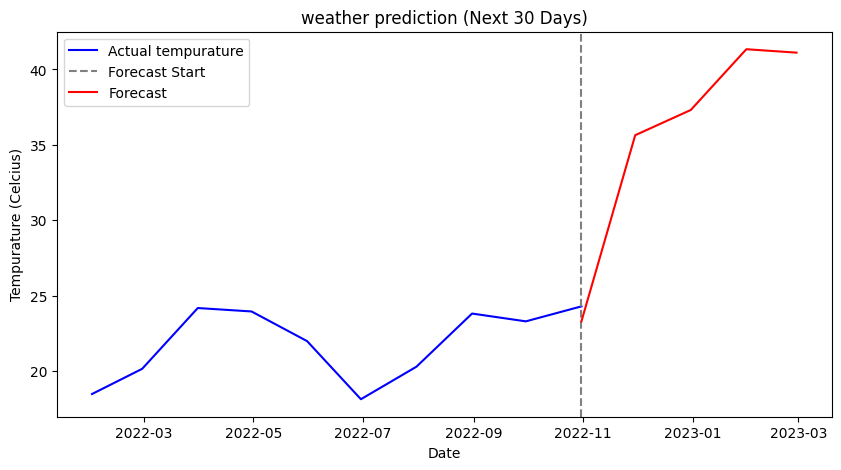

In [7]:
# Plot results
plt.figure(figsize=(10,5))
plt.plot(df_monthly, label="Actual tempurature", color="blue")
plt.axvline(test.index[0], color="gray", linestyle="--", label="Forecast Start")
plt.plot(forecast_index, forecast_values, label="Forecast", color="red")
plt.legend()
plt.title("weather prediction (Next 30 Days)")
plt.xlabel("Date")
plt.ylabel("Tempurature (Celcius)")
plt.show()

In [8]:
# Output forecasted prices
print("Predicted prices for the next 30 days:")
print(predicted_mean)

Predicted prices for the next 30 days:
2022-10-31    23.311385
2022-11-30    35.642574
2022-12-31    37.313585
2023-01-31    41.339135
2023-02-28    41.112243
Freq: ME, Name: predicted_mean, dtype: float64
